# Project: TMDb Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
 
> The selected dataset for this analysis is the "TMDB 5000 Movie Dataset" from kaggle (https://www.kaggle.com/tmdb/tmdb-movie-metadata/home). We want to explore the potential factors that make a movie earn the most revenue and profit. The major dependent variables we will be looking at is revenue, and the major independent vaiables are genres, cast, and directors.


>***Background (Received from Kaggle and changed based on this project):***
> What can we say about the success of a movie before it is released? Are there certain casts/directors that have found a consistent formula? Given that major films costing over $100 million to produce can still flop, this question is more important than ever to the industry. Film aficionados might have different interests. Can we predict which films will be highly profitable? This is a great place to start digging in to those questions, with data on the plot, cast, crew, budget, and revenues of several thousand films.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


> ***Questions to explore:***
>
> 1. Which genres are most popular from year to year? 
> 2. Which actor is likely to produce more movie revenue?
> 3. Which director are likely to produce more revenue?

<a id='wrangling'></a>
## Data Wrangling

In [2]:
# load the data
df = pd.read_csv('tmdb-movies.csv')
# we want to see the data in all the columns
pd.options.display.max_columns = None
# clean the scientific notation 
pd.options.display.float_format = '{:.2f}'.format
display(df)
# print out a few lines
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,137999939.28,1392445892.52
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,137999939.28,348161292.49
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,101199955.47,271619025.41
3,140607,tt2488496,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,183999919.04,1902723129.80
4,168259,tt2820852,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30,2015,174799923.09,1385748801.47
5,281957,tt1663202,9.11,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",father-son relationship|rape|based on novel|mo...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.20,2015,124199945.35,490314247.02
6,87101,tt1340138,8.65,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,saving the world|artificial intelligence|cybor...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.80,2015,142599937.26,405355075.68
7,286217,tt3659388,7.67,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,based on novel|mars|nasa|isolation|botanist,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.60,2015,99359956.28,547749654.31
8,211672,tt2293640,7.40,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",assistant|aftercreditsstinger|duringcreditssti...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.50,2015,68

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,137999939.28,1392445892.52
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,137999939.28,348161292.49
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,101199955.47,271619025.41
3,140607,tt2488496,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,183999919.04,1902723129.80
4,168259,tt2820852,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30,2015,174799923.09,1385748801.47


### Data Cleaning
- Browse data type and data shape
- Drop irrelevant information
- Clean duplicate records if there are any
- Clean the missing data if there are any
- Create new dataframes to be ready for further anaysis in the next section


In [3]:
# Perform operations to inspect data types and look for instances of missing or possibly errant data.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

>***Notes:*** 
> 9 columns have missing data: imdb_id, cast, homepage, director, tagline, keywords, overview, genres, production_companies. We will clean the missing data later.
>
> Some columns are irrelevant to this analysis, so we can drop them. They are: homepage, tagline, overview

In [4]:
df.drop(['homepage', 'tagline','overview'], axis=1, inplace=True) # drop the irrelevant columns

In [5]:
df.shape # check and see if the columns are dropped successfully

(10866, 18)

In [6]:
# see if there is any duplicated records
df.duplicated().sum()


1

In [7]:
# there is one duplicated record. Let's drop it
df.drop_duplicates(inplace=True)


In [8]:
df.shape #check and see if we dropped the duplicated record successfully

(10865, 18)

In [9]:
df['genres'].fillna('missing', inplace=True) #fill in the 'missing' in the genres column


In [10]:
print(df['genres'].isnull().sum()) #check and see if the there is nay NaN values

0


In [11]:
df['director'].fillna('missing', inplace=True) #fill in the 'missing' in the director column

In [12]:
print(df['director'].isnull().sum())

0


In [13]:
df.query("revenue==0")['id'].count()

6016

***Notes:***
There are 6016 missing values in our data.

In [14]:
df['revenue'].mean()

39826896.07685228

In [15]:
df['revenue'].fillna(39826896, inplace=True) #fill in the mean value in the missing data of the revenue column

***Based on the questions, create new dataframes for further analysis in the next section***

In [16]:
# get the number of items in each cell in the genres column
def getLength(myList):
    return len(myList.split('|'))
# get the maximum number of genres in the genres column
maxLen = df['genres'].apply(lambda x: getLength(x)).max()
print(maxLen)


5


In [17]:
unique_genres = []

def find_genres(myList):
    split_genres = myList.split('|')
    for x in split_genres:
        if x not in unique_genres:
            unique_genres.append(x)
            

    
df['genres'].apply(lambda x: find_genres(x))

print(unique_genres)

['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy', 'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy', 'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror', 'Documentary', 'TV Movie', 'missing', 'Foreign']


In [18]:
df_test = df.loc[:, ['id','release_year']]
for x in unique_genres:
    df_test[x] = 0

df_test.head(30)

,id,release_year,Action,Adventure,Science Fiction,Thriller,Fantasy,Crime,Western,Drama,Family,Animation,Comedy,Mystery,Romance,War,History,Music,Horror,Documentary,TV Movie,missing,Foreign
0,135397,2015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,76341,2015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,262500,2015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,140607,2015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,168259,2015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,281957,2015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,87101,2015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,286217,2015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,211672,2015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,150540,2015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:

def update_df_test(genres, movie_id):
    split_genres = genres.split('|')
    for g in split_genres:
        df_test.loc[df_test.id == movie_id, g] = 1
        
df.apply(lambda x: update_df_test(x['genres'], x['id']), axis=1)

0        None
1        None
2        None
3        None
4        None
5        None
6        None
7        None
8        None
9        None
10       None
11       None
12       None
13       None
14       None
15       None
16       None
17       None
18       None
19       None
20       None
21       None
22       None
23       None
24       None
25       None
26       None
27       None
28       None
29       None
         ... 
10836    None
10837    None
10838    None
10839    None
10840    None
10841    None
10842    None
10843    None
10844    None
10845    None
10846    None
10847    None
10848    None
10849    None
10850    None
10851    None
10852    None
10853    None
10854    None
10855    None
10856    None
10857    None
10858    None
10859    None
10860    None
10861    None
10862    None
10863    None
10864    None
10865    None
Length: 10865, dtype: object

In [20]:
df_test.head(30)

,id,release_year,Action,Adventure,Science Fiction,Thriller,Fantasy,Crime,Western,Drama,Family,Animation,Comedy,Mystery,Romance,War,History,Music,Horror,Documentary,TV Movie,missing,Foreign
0,135397,2015,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,76341,2015,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,262500,2015,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,140607,2015,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,168259,2015,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,281957,2015,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6,87101,2015,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,286217,2015,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
8,211672,2015,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0
9,150540,2015,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0


In [21]:
df_test.groupby('release_year').sum()

,id,Action,Adventure,Science Fiction,Thriller,Fantasy,Crime,Western,Drama,Family,Animation,Comedy,Mystery,Romance,War,History,Music,Horror,Documentary,TV Movie,missing,Foreign
release_year,,,,,,,,,,,,,,,,,,,,,,
1960,502889,8,5,3,6,2,2,6,13,3,0,8,0,6,2,5,1,7,0,0,0,1
1961,578367,7,6,4,0,2,2,3,16,5,1,10,1,7,2,3,2,3,0,0,0,1
1962,544034,8,7,2,7,1,3,3,21,2,0,5,4,5,3,4,1,5,0,0,0,1
1963,562904,4,7,2,10,2,4,2,13,3,1,13,6,8,1,4,0,9,0,0,0,2
1964,729942,5,5,4,9,4,10,1,20,4,2,16,4,9,3,3,5,6,0,0,0,1
1965,614765,9,6,2,11,0,2,4,20,3,1,7,3,5,8,4,2,5,0,1,0,1
1966,759644,14,11,6,8,2,5,7,16,7,3,16,6,6,4,2,0,3,1,0,0,2
1967,697188,7,7,4,5,3,7,2,16,3,2,17,3,11,1,0,5,4,1,0,0,0
1968,726515,6,5,4,5,5,5,1,20,5,3,9,4,6,4,3,3,4,0,0,0,0


In [22]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 23 columns):
id                 10865 non-null int64
release_year       10865 non-null int64
Action             10865 non-null int64
Adventure          10865 non-null int64
Science Fiction    10865 non-null int64
Thriller           10865 non-null int64
Fantasy            10865 non-null int64
Crime              10865 non-null int64
Western            10865 non-null int64
Drama              10865 non-null int64
Family             10865 non-null int64
Animation          10865 non-null int64
Comedy             10865 non-null int64
Mystery            10865 non-null int64
Romance            10865 non-null int64
War                10865 non-null int64
History            10865 non-null int64
Music              10865 non-null int64
Horror             10865 non-null int64
Documentary        10865 non-null int64
TV Movie           10865 non-null int64
missing            10865 non-null int64
Foreign    

In [23]:
df_test_year_genres = df_test.groupby('release_year').sum()

In [24]:
df_test_year_genres.head()

,id,Action,Adventure,Science Fiction,Thriller,Fantasy,Crime,Western,Drama,Family,Animation,Comedy,Mystery,Romance,War,History,Music,Horror,Documentary,TV Movie,missing,Foreign
release_year,,,,,,,,,,,,,,,,,,,,,,
1960,502889,8,5,3,6,2,2,6,13,3,0,8,0,6,2,5,1,7,0,0,0,1
1961,578367,7,6,4,0,2,2,3,16,5,1,10,1,7,2,3,2,3,0,0,0,1
1962,544034,8,7,2,7,1,3,3,21,2,0,5,4,5,3,4,1,5,0,0,0,1
1963,562904,4,7,2,10,2,4,2,13,3,1,13,6,8,1,4,0,9,0,0,0,2
1964,729942,5,5,4,9,4,10,1,20,4,2,16,4,9,3,3,5,6,0,0,0,1


In [25]:
df_test_year_genres['missing'].sum() #check if sum is correct

23

In [26]:
df_test_year_genres.drop(['id'], axis=1, inplace=True)

In [27]:
df_test_year_genres.shape #new dataframe is ready to be used for the questions 1

(56, 21)

In [28]:
df['cast'].isnull().sum()

76

In [29]:
df['cast'].fillna('missing', inplace=True)

In [30]:
df['cast'].isnull().sum() #check and see if we cleaned the missing values

0

In [31]:
all_cast = df['cast'].str.split('|').apply(pd.Series,1).stack()

In [32]:
all_cast.index = all_cast.index.droplevel(-1)

In [33]:
all_cast.name = 'actors'

In [34]:
df_cast = df.join(all_cast)

In [35]:
df_cast.head() ##new dataframe is ready to be used for the questions 2

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,actors
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,137999939.28,1392445892.52,Chris Pratt
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,137999939.28,1392445892.52,Bryce Dallas Howard
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,137999939.28,1392445892.52,Irrfan Khan
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,137999939.28,1392445892.52,Vincent D'Onofrio
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,137999939.28,1392445892.52,Nick Robinson


In [36]:
all_director = df['director'].str.split('|').apply(pd.Series,1).stack()

In [37]:
all_director.index = all_director.index.droplevel(-1)

In [38]:
all_director.name = 'directors'

In [39]:
df_director = df.join(all_director)

In [40]:
df_director.shape #new dataframe is ready to be used for the questions 3

(11935, 19)

<a id='eda'></a>
## Exploratory Data Analysis

> **Main Approach**: Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1: The relationship between release_year and genres
- Which genre is the most popular one of all time?
- Did the most popular genre change over time?
- Follow-up: What is the relationship between the most popular genre and the movie revenue/rating?

In [41]:
# Let's find the most popular movie genre of all time
df_test_year_genres.sum().sort_values(ascending=False)


Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
missing              23
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E947F15630>,
      dtype=object)

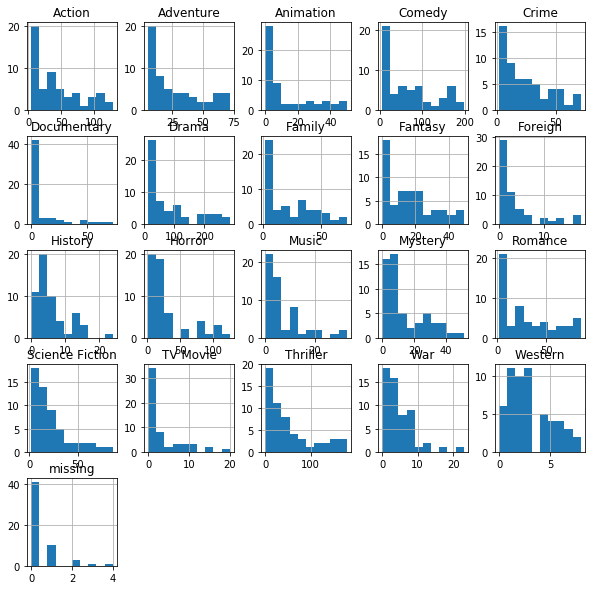

In [42]:
df_test_year_genres.hist(figsize=(10,10))

***Findings:***
- It looks like most of the genres are skewed to the right, except for the 'Western' genre.

[Text(0,0.5,'Numer of Movies'), Text(0.5,0,'Release Year')]

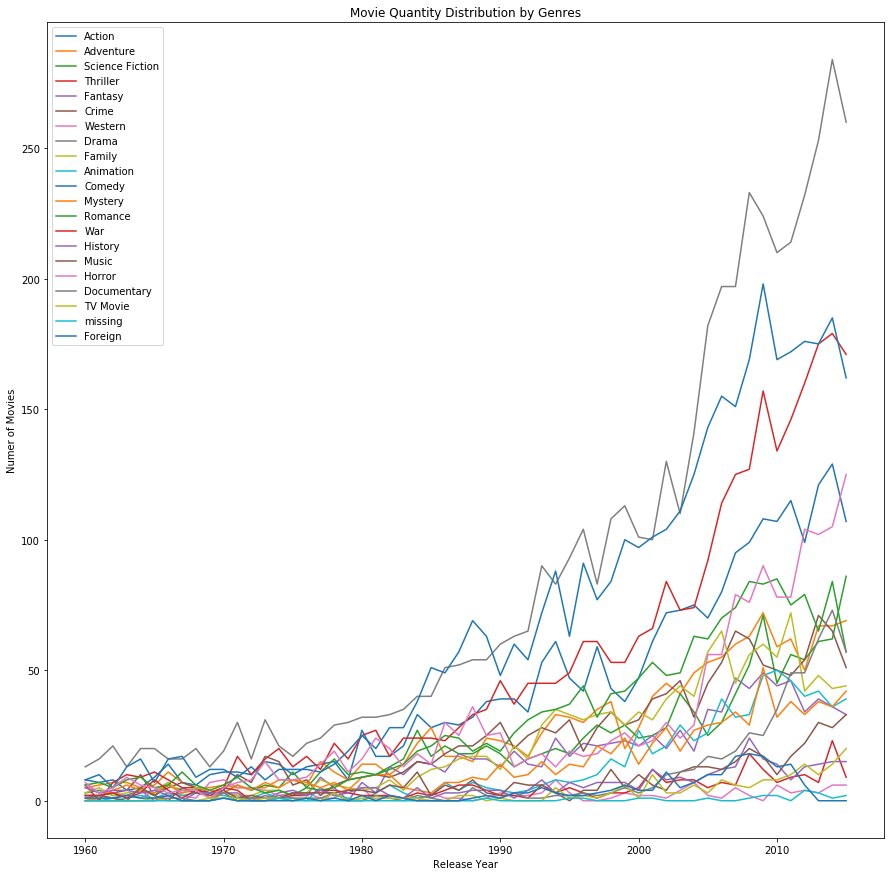

In [195]:
# plot the release_year and genres to explore their relationship
plt1=df_test_year_genres.plot(title='Movie Quantity Distribution by Genres', figsize=(15,15))
plt1.set(xlabel='Release Year', ylabel='Numer of Movies')


***Findings:***
> 1. Overall, the 'Drama' genre is the most popular movie genre of all time. Following the 'Drama' genre, 'Comedy' genre is the second more popular one, followed by the 'Thriller' genre.
>
> 2. The most popular movie genre did change over years. From 1985 - 1989, 'Comedy' surpassed the 'Drama' genre, becoming the ost popular movie genre in that period. The 'Thriller' genre was not the popular one back in 1960s, but it has become more popular since 1970.
>
> 3. In terms of the movie quantity, there is a steep increase around 2005. 




In [70]:
df_genre_all=df_test.merge(df, on='id')
df_genre_all.tail()


,id,release_year_x,Action,Adventure,Science Fiction,Thriller,Fantasy,Crime,Western,Drama,Family,Animation,Comedy,Mystery,Romance,War,History,Music,Horror,Documentary,TV Movie,missing,Foreign,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year_y,budget_adj,revenue_adj
10860,21,1966,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,tt0060371,0.08,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,surfer|surfboard|surfing,95,Documentary,Bruce Brown Films,6/15/66,11,7.40,1966,0.00,0.00
10861,20379,1966,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,tt0060472,0.07,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,car race|racing|formula 1,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.70,1966,0.00,0.00
10862,39768,1966,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,tt0060161,0.07,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,car|trolley|stealing car,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.50,1966,0.00,0.00
10863,21449,1966,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,tt0061177,0.06,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,spoof,80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.40,1966,0.00,0.00
10864,22293,1966,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,tt0060666,0.04,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,Harold P. Warren,fire|gun|drive|sacrifice|flashlight,74,Horror,Norm-Iris,11/15/66,15,1.50,1966,127642.28,0.00


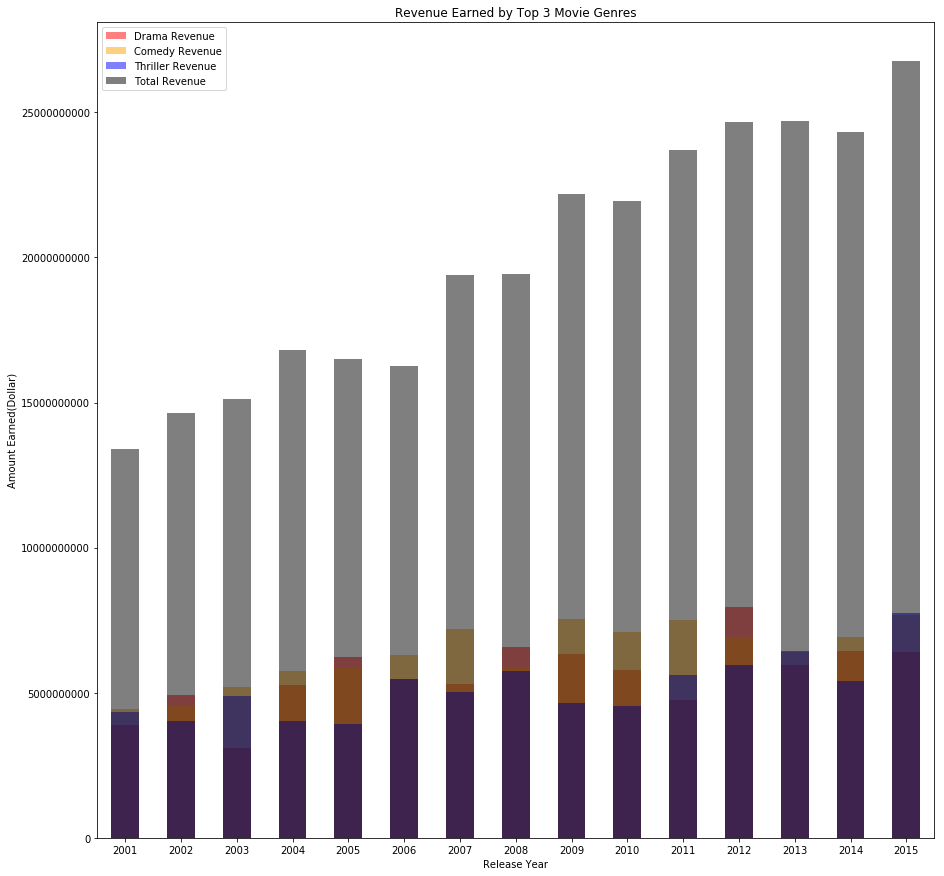

In [194]:
df_genre_all.query('Drama==1').groupby('release_year_x')['revenue'].sum().tail(15).plot(kind='bar',alpha=0.5,color='red',rot=0,title='Revenue Earned by Top 3 Movie Genres',figsize=(15,15)).ticklabel_format(style='plain', axis='y')
df_genre_all.query('Comedy==1').groupby('release_year_x')['revenue'].sum().tail(15).plot(kind='bar',alpha=0.5,color='orange',rot=0,figsize=(15,15)).set(xlabel='Release Year', ylabel='Amount Earned(Dollar)')
df_genre_all.query('Thriller==1').groupby('release_year_x')['revenue'].sum().tail(15).plot(kind='bar',alpha=0.5,color='blue',rot=0,figsize=(15,15)).set(xlabel='Release Year', ylabel='Amount Earned(Dollar)')
df_genre_all.groupby('release_year_x')['revenue'].sum().tail(15).plot(kind='bar',alpha=0.5,color='black',rot=0,figsize=(15,15)).set(xlabel='Release Year', ylabel='Amount Earned(Dollar)')

plt.legend(["Drama Revenue", "Comedy Revenue","Thriller Revenue","Total Revenue"])


***Findings:***
- In the recent three years(2013-2015), "Drama" genre did not make the most revenue.
- For most of the years(9 out of 15 years), "Comedy" genre maked the most revenue among the top three genres.


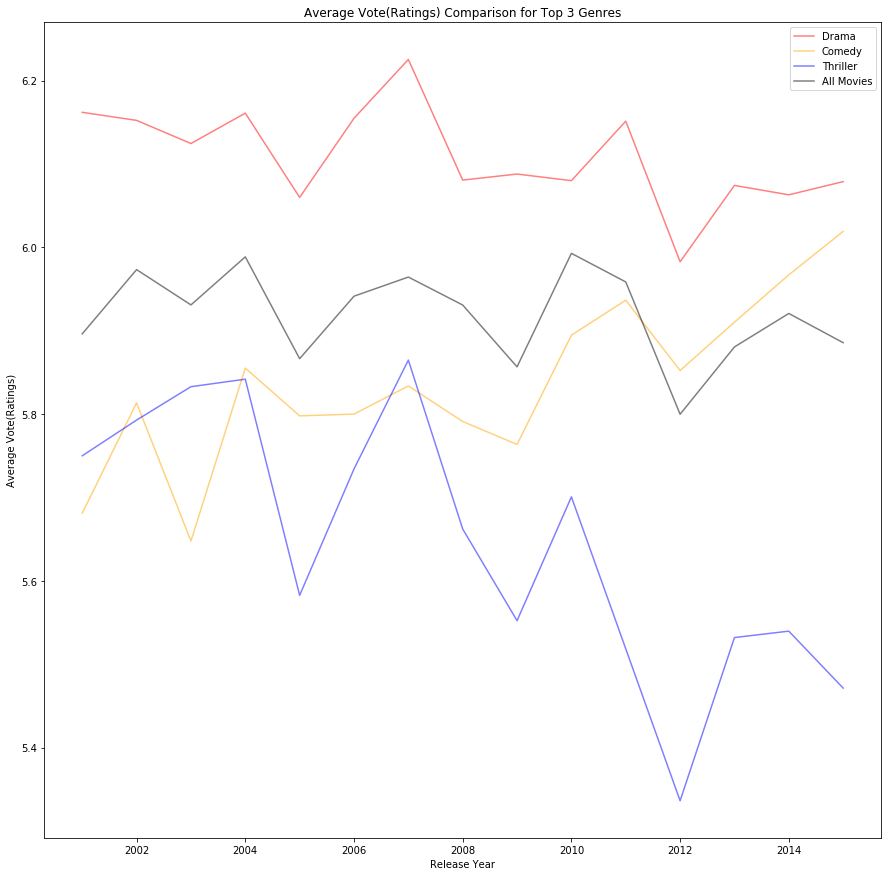

In [192]:
df_genre_all.query('Drama==1').groupby('release_year_x')['vote_average'].mean().tail(15).plot(kind='line',alpha=0.5,color='red',title='Average Vote(Ratings) Comparison for Top 3 Genres',figsize=(15,15))
df_genre_all.query('Comedy==1').groupby('release_year_x')['vote_average'].mean().tail(15).plot(kind='line',alpha=0.5,color='orange',figsize=(15,15)).set(xlabel='Release Year', ylabel='Average Vote(Ratings)')
df_genre_all.query('Thriller==1').groupby('release_year_x')['vote_average'].mean().tail(15).plot(kind='line',alpha=0.5,color='blue',figsize=(15,15)).set(xlabel='Release Year', ylabel='Average Vote(Ratings)')
df_genre_all.groupby('release_year_x')['vote_average'].mean().tail(15).plot(kind='line',alpha=0.5,color='black',figsize=(15,15)).set(xlabel='Release Year', ylabel='Average Vote(Ratings)')
plt.legend(["Drama", "Comedy", "Thriller", "All Movies"])


***Findings:***
- On average, "Drama" genre's rating is higher than the average ratings for all genres.


### Research Question 2: The relationship between revenue and casts
- What is the average revenue?
- Who earned the most revenue of all time?
- Who casted the most number of movies?
- Who earned the most revenue on average?


In [143]:
# get a basic idea of all the numeric data
df.describe()


,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.00,10865.00,10865.00,10865.00,10865.00,10865.00,10865.00,10865.00,10865.00,10865.00
mean,66066.37,0.65,14624286.06,39826896.08,102.07,217.40,5.98,2001.32,17549894.04,51369001.76
std,92134.09,1.00,30914284.61,117008277.46,31.38,575.64,0.94,12.81,34307526.66,144638333.13
min,5.00,0.00,0.00,0.00,0.00,10.00,1.50,1960.00,0.00,0.00
25%,10596.00,0.21,0.00,0.00,90.00,17.00,5.40,1995.00,0.00,0.00
50%,20662.00,0.38,0.00,0.00,99.00,38.00,6.00,2006.00,0.00,0.00
75%,75612.00,0.71,15000000.00,24000000.00,111.00,146.00,6.60,2011.00,20853251.08,33701729.01
max,417859.00,32.99,425000000.00,2781505847.00,900.00,9767.00,9.20,2015.00,425000000.00,2827123750.41


***Findings:***
> Budget:
- The avergae budget of a movie is 14,624,286.06. 
- The highest budget is 425,000,000.

> Revenue:
- The average movie revenue is 39,826,896.08.
- The highest revenue is 2,781,505,847.00.

> Runtime:
- The average runtime is 102 mins. The highest runtime is 900 mins.

> Vote_average:
- The average rating for a movie is 5.98.
- The highest rating for a movie is 9.2 and the lowest is 1.50.






In [144]:
df_cast_tot_revenue = df_cast.groupby('actors')['revenue'].sum().sort_values(ascending=False).reset_index()
df_cast_tot_revenue.head()


,actors,revenue
0,Harrison Ford,8922840695
1,Tom Cruise,8812436186
2,Tom Hanks,8418142612
3,Emma Watson,8176916698
4,Ian McKellen,8115046043


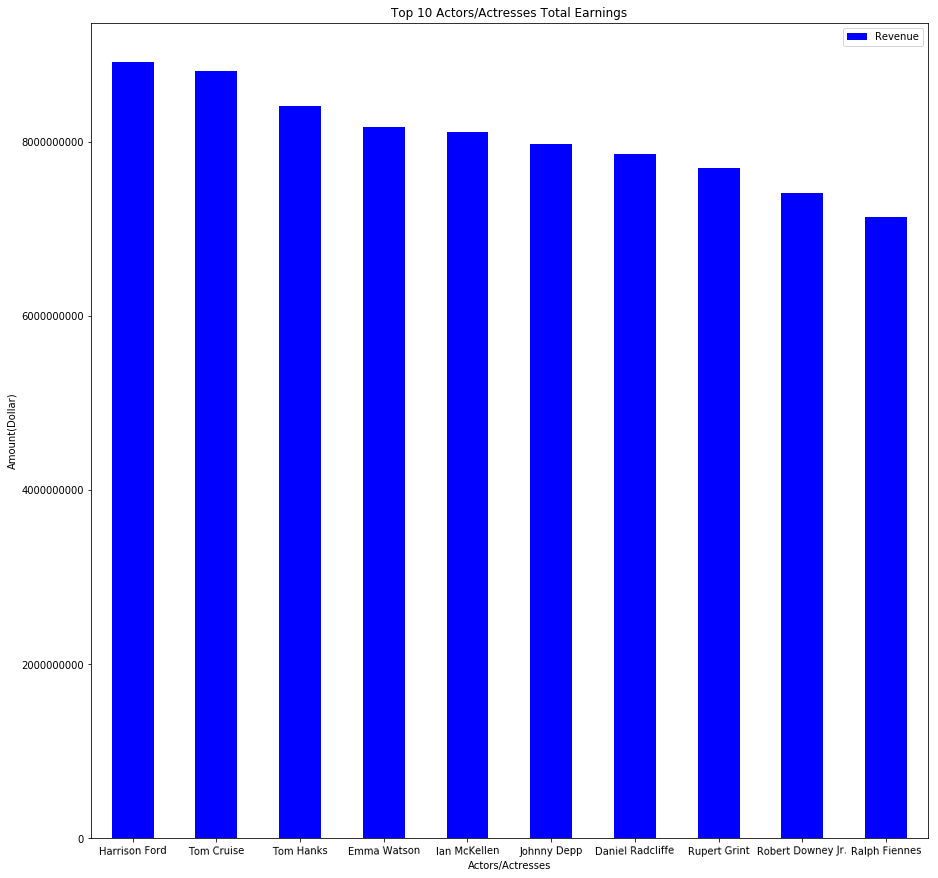

In [189]:
# plot the bar chart
df_cast_tot_revenue.head(10).plot.bar(x='actors',y='revenue',color='blue',title='Top 10 Actors/Actresses Total Earnings',rot=1, 
                                      figsize=(15,15)).set(xlabel='Actors/Actresses', ylabel='Amount(Dollar)')
plt.ticklabel_format(style='plain', axis='y')
plt.legend(['Revenue'])


***Findings:***
- Harrison Ford earned the most revenue of all time.
- Top 5 actors/actresses who earned the most revenue of all time are: Harrison Ford, Tom Cruise, Tom Hanks, Emma Watson, and Ian Mckellen.


Text(0.5,1,'Harrison Ford Movies Budget and Revenue')

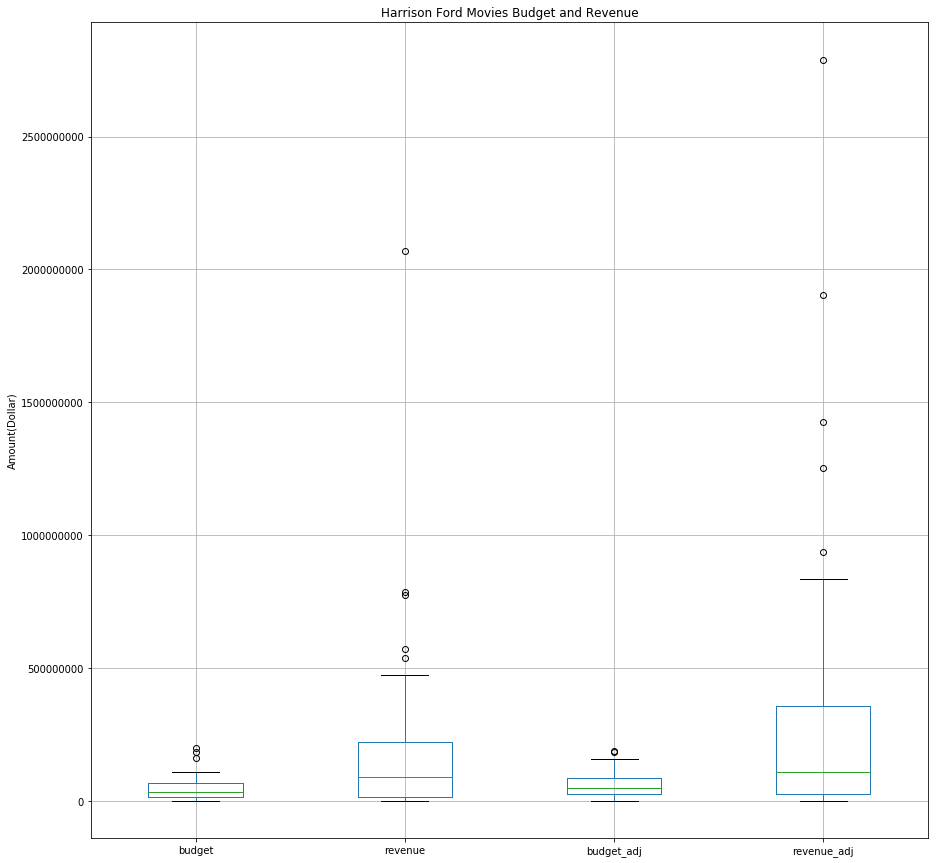

In [181]:
df_cast.query("actors=='Harrison Ford'").boxplot(column=['budget','revenue','budget_adj','revenue_adj'],figsize=(15,15)).set(ylabel='Amount(Dollar)')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Harrison Ford Movies Budget and Revenue' )


***Findings:***
- The median movie revenue of Harrison Ford's movies is higher than the upper quartile of the movies' budget, showing the profitable return.


In [864]:
df_cast.query("actors=='Harrison Ford'")['vote_average'].mean()

6.347619047619048

***Findings:***
- The average rating of Harrison Ford's movies is higher than the average rating of all movies.


In [865]:
df_cast.groupby('actors')['id'].count().sort_values(ascending=False).head(20)

actors
missing               76
Robert De Niro        72
Samuel L. Jackson     71
Bruce Willis          62
Nicolas Cage          61
Michael Caine         53
Robin Williams        51
John Cusack           50
Morgan Freeman        49
John Goodman          49
Liam Neeson           48
Susan Sarandon        48
Alec Baldwin          47
Julianne Moore        47
Johnny Depp           46
Christopher Walken    46
Gene Hackman          46
Tom Hanks             46
Sylvester Stallone    45
Willem Dafoe          45
Name: id, dtype: int64

***Findings:***
- Robert De Niro casted the most number of movies of all time (72).
- Top 5 actors/actresses who casted the most number of movies are: Robert De Niro, Samuel L. Jackson, Bruce Willis, Nicolas Cage, and Michael Caine.


In [866]:
df_cast.groupby('actors')['revenue'].mean().sort_values(ascending=False).head(20)

actors
Daisy Ridley         2068178225.00
Santino Fontana      1274219009.00
Bob Peck              920100000.00
Robert MacNaughton    792910554.00
Rosemary Harris       783766341.00
Richard Armitage      772781387.50
Isobelle Molloy       758410378.00
Helmut Bakaitis       738599701.00
Phaldut Sharma        716392705.00
Rebecca Ferguson      682330139.00
Ian McDiarmid         657446847.00
Daniel Henney         652105443.00
Ryan Potter           652105443.00
Dominique Louis       631442092.00
Maia Morgenstern      611899420.00
Francesco De Vito     611899420.00
Christo Jivkov        611899420.00
Gautam Belur          609016565.00
Ayush Tandon          609016565.00
Willow Smith          585349010.00
Name: revenue, dtype: float64

***Findings:***
- Daisy Ridley earned the most revenue per movie.
- Top 5 actors/actress earned the most renuve per movie are: Daisy Ridley, Santino Fontana, Bob Peck, Robert MacNaughton, and Rosemary Harris.


In [828]:
df_cast.query("actors=='Daisy Ridley'")['id'].count()

1

In [867]:
#Find who earned the most revenue in the year of 2015
df_cast.query('release_year==2015').groupby(['actors'])['revenue'].sum().sort_values(ascending=False).head(1)


actors
Harrison Ford    2110808001
Name: revenue, dtype: int64

In [868]:
df_cast.query("release_year==2015 and actors=='Harrison Ford'")['id'].count()

2

### Research Question 3: The relationship between revenue and directors
- How did the revenue change over years?
- Which director produced the highest movie revenue?


Text(0.5,1,'Movie Revenue Changes Over Years')

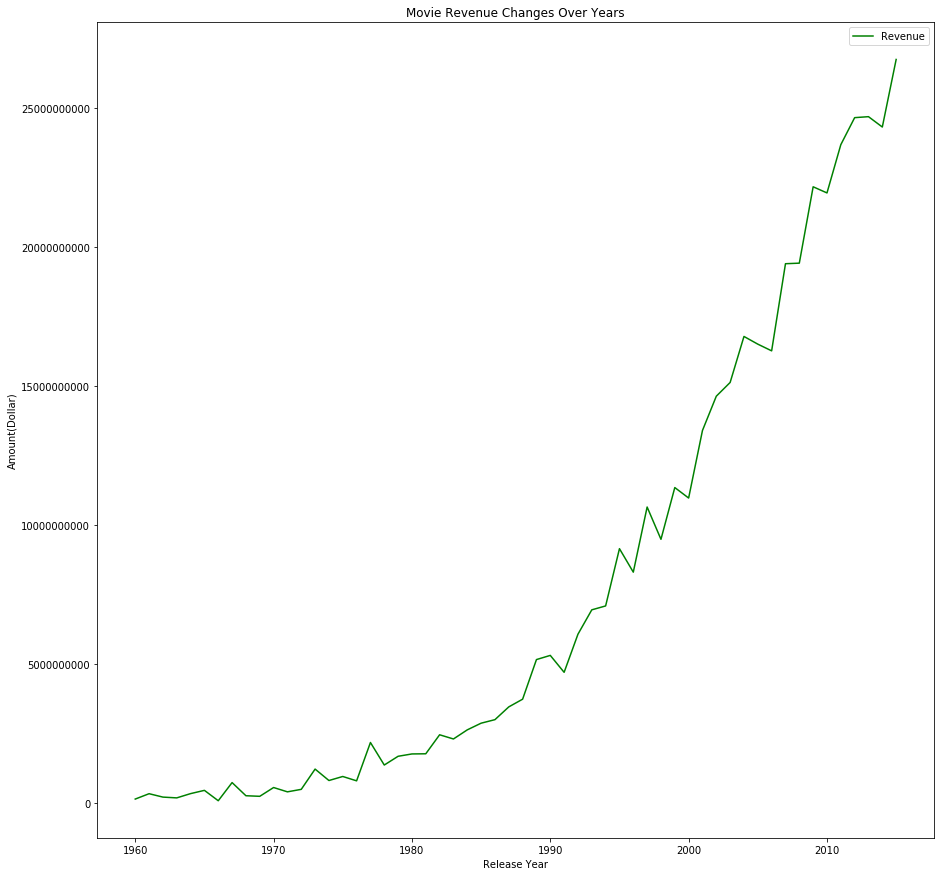

In [188]:
df.groupby('release_year')['revenue'].sum().plot(kind='line',color='green',figsize=(15,15)).set(xlabel='Release Year', ylabel='Amount(Dollar)')

plt.ticklabel_format(style='plain', axis='y')
plt.legend(["Revenue"])
plt.title('Movie Revenue Changes Over Years')


***Findings:***
- It looks like on average, movie revenue has been increasing over years. After 1990, movie revenue has increased sharply and rapidly.


In [870]:
df_director.groupby('directors')['revenue'].sum().sort_values(ascending=False).head(10)

directors
Steven Spielberg     9048014691
Peter Jackson        6523244659
James Cameron        5841894863
Michael Bay          4917208171
Christopher Nolan    4167548502
David Yates          4154295625
Robert Zemeckis      3869690869
Chris Columbus       3851491668
Tim Burton           3782609685
Ridley Scott         3649996480
Name: revenue, dtype: int64

***Findings:***
- Director that earned the most movie revenue of all time is Steven Spielberg.
- Top 5 directors who earned the most movie revenue of all time are: Steven Spielberg, Peter Jackson, James Cameron, Michael Bay, and Christopher Nolan. 



Text(0.5,1,'Steven Spielberg Movies Budget and Revenue')

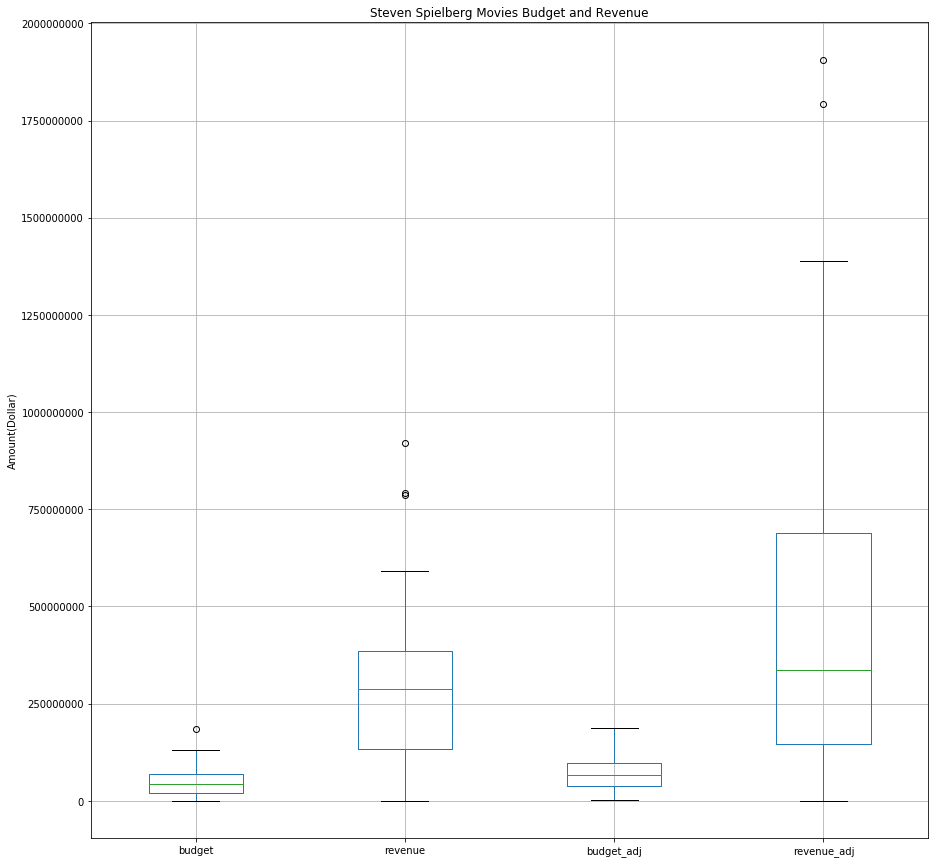

In [182]:
df_director.query("directors=='Steven Spielberg'").boxplot(column=['budget','revenue','budget_adj','revenue_adj'],figsize=(15,
15)).set(ylabel='Amount(Dollar)')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Steven Spielberg Movies Budget and Revenue')

***Findings:***
- The median of Steven Spielberg's movie revenue is higher than the higher quartile of his movies budget.


In [686]:
df_director.groupby('directors')['id'].count().sort_values(ascending=False).head(10)

directors
Woody Allen          46
missing              44
Clint Eastwood       34
Martin Scorsese      31
Steven Spielberg     30
Steven Soderbergh    23
Ridley Scott         23
Ron Howard           22
Joel Schumacher      21
Tim Burton           20
Name: id, dtype: int64

***Findings:***
- Director that directed the most number of movies of all time is Woody Allen.
- Top 5 directors who directed the most number of movies of all time are: Woody Allen, Clint Eastwood, Martin Scorsese, Steven Spielberg, and Steven Soderbergh.


Text(0.5,1,'Woody Allen Movies Budget and Revenue')

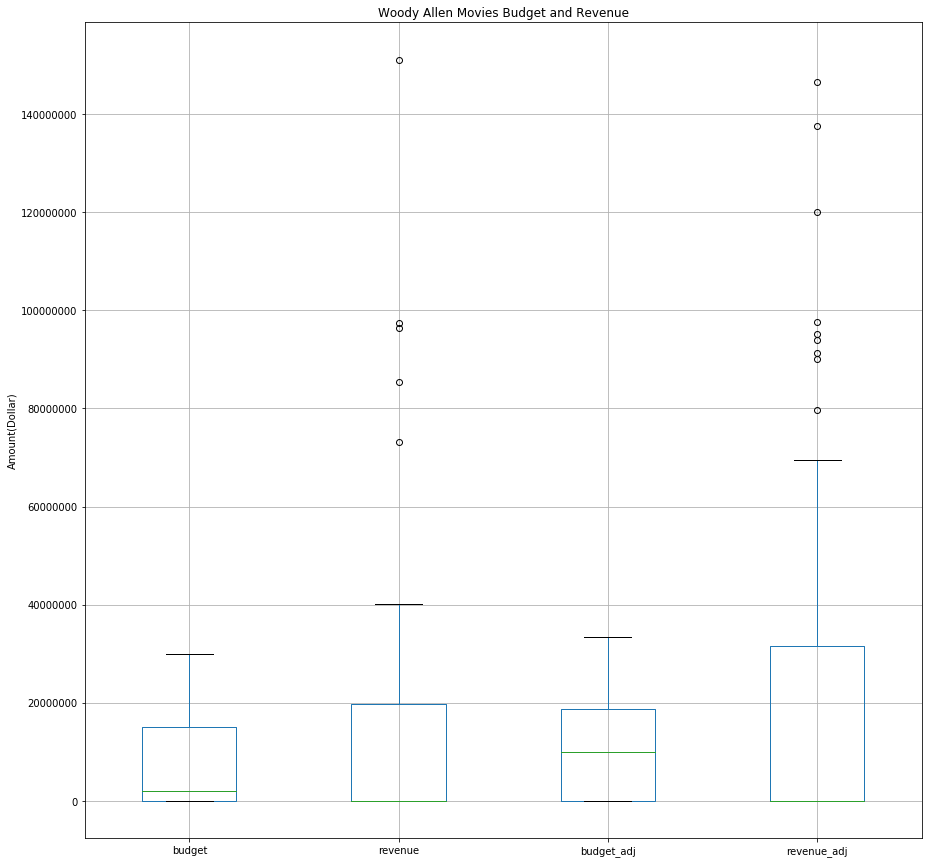

In [187]:
df_director.query("directors=='Woody Allen'").boxplot(column=['budget','revenue','budget_adj','revenue_adj'],figsize=(15,15)).set(ylabel='Amount(Dollar)')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Woody Allen Movies Budget and Revenue')

***Fidnings:***
- As we can see, the median movie revenue of Woody Allen's movies is lower than his movies' median budget, showing that his movies generated relatively less profit.


In [687]:
df_director.groupby('directors')['revenue'].mean().sort_values(ascending=False).head(10)

directors
Pierre Coffin      890335610.67
David Yates        830859125.00
Colin Trevorrow    758768301.00
Robert Stromberg   758410378.00
Lee Unkrich        743907331.00
Bob Peterson       731342744.00
J.J. Abrams        715833983.20
Conrad Vernon      682756634.00
Chris Miller       676972821.00
Jennifer Yuh       665692281.00
Name: revenue, dtype: float64

In [835]:
df_director.query("directors=='Pierre Coffin'")['id'].count()

3

In [836]:
df_director.query("directors=='David Yates'")['id'].count()

5

In [837]:
df_director.query("directors=='Colin Trevorrow'")['id'].count()

2

***Findings:***
- On average, Pierre Coffin earned the most revenue per movie.
- Top 5 directors who earned the most revenue per movie are: Pierre Coffin, David Yates, Colin Trevorrow, Robert Stromberg, and Lee Unkrich. However, the number of their movies are too low to draw significant conclusions.

<a id='conclusions'></a>
## Conclusions

> 1. Overall, in terms of the movie quantity, the 'Drama' genre is the most popular movie genre of all time. Following the 'Drama' genre, 'Comedy' genre is the second more popular one, followed by the 'Thriller' genre. Despite the fact that the average rating of 'Drama' movies is higher than the average rating of all movies, 'Comedy' movies seem to genrate more revenue.
>
> 2. Actor Harrison Ford earned the most revenue of all time. The median movie revenue of Harrison Ford's movies is higher than the upper quartile of the movies' budget, showing the sizable profits.
>
> 3. Director that earned the most movie revenue of all time is Steven Spielberg. The lower quartile of Steven Spielberg's movie revenue is higher than the higher quartile of his movies budget, hsowing the sizable profits.
>
***Limitations:***
- There may be a better way to handle the missing values(0 in this case) in the revenue column.
- Some lines of codes might be able to be more efficient.
- Some other graph types might be more appropriate in some of the visualizations.